In [46]:
import numpy as np
import matplotlib.pyplot as plt

Решается уравнение
\begin{cases}
a_n y^{(n)} + \dots + a_1 y' + a_0 y = f(t) \\
y(t_0) = y_0 \\
\dots \\
y^{(n-1)}(t_0) = y_0^{(n-1)}
\end{cases}
Сделаем замену
\begin{eqnarray}
y_1(t) = y(t) \\
y_2(t) = y'(t) \\
\dots \\
y_n(t) = y^{(n-1)}(t)
\end{eqnarray}
Получим систему 
\begin{cases}
y'_1 = y_2 \\
\dots \\
y'_{n-1} = y_n \\
y'_n = \frac{f(t) - a_{n-1}y_n - \dots - a_0y_1}{a_n}
\end{cases}
Решаем её методом Эйлера

Уравнение задается следующими параметрами:

coefs - массив коэффициентов ($coefs[i] = a_i$)

f - правая часть в виде lambda-функции

start - массив начальных условий ($start[i] = y^{(i)}(t_0)$)

a, b - начало и конец отрезка, на котором ищется решение

N - параметр разбиения

In [47]:
def solve(coefs, f, start, a, b, N):
    h = (b-a) / (N-1)
    dim = len(coefs) - 1
    result = np.zeros(N)
    current_system_solvation = start.copy()
    result[0] = current_system_solvation[0]
    F = np.zeros(dim)
    F[0:dim-1] = current_system_solvation[1:dim]
    for i in range(1, N):
        F[dim-1] = (f(a + h*i) - np.dot(coefs[0:dim], current_system_solvation)) / coefs[dim]
        current_system_solvation = current_system_solvation + h*F
        # Т.к. интересует само решение, то выбирается 0-ая компонента, которая соответствует y(t_i).
        # Если бы требовалось найти k-ую производную решения, то писали бы current_system_solvation[k].
        result[i] = current_system_solvation[0]
        F[0:dim-1] = current_system_solvation[1:dim]
    return result

def error_norm(y1, y2):
    return np.max(np.abs(y1-y2))

Рассмотрим тестовую задачу, для которой известно точное решение:
\begin{cases}
y'' + y = t^2 + 2 \\
y(0) = 0 \\
y'(0) = 1
\end{cases}

Точное решение $y = sin(t) + t^2$

Error= 0.041741330020651723


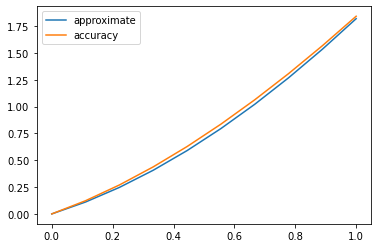

In [48]:
N = 10
y_accur = lambda t:t**2 + np.sin(t)
t = np.linspace(0, 1, N)
y_approx = solve(coefs=np.array([1,0,1]), f=lambda t: t**2 + 2, start=np.array([0,1]), a=0, b=1, N=N)
print("Error=", error_norm(y_approx, y_accur(t)))
plt.plot(t, y_approx, label='approximate')
plt.plot(t, y_accur(t), label='accuracy')
plt.legend()

In [49]:
Ns = [8, 16, 32, 64, 128, 256]
for N in Ns:
    t = np.linspace(0, 1, N)
    y_approx = solve(coefs=np.array([1,0,1]), f=lambda t: t**2 + 2, start=np.array([0,1]), a=0, b=1, N=N)
    print("Error=", error_norm(y_approx, y_accur(t)))

Error= 0.05533629291498876
Error= 0.023720930161666542
Error= 0.010957387482150693
Error= 0.00527482268032009
Error= 0.002588148753889574
Error= 0.0012820193765282761


По-видимому, метод реализован правильно :)

Видно так же, что при уменьшении шага h в 2 раза, ошибка уменьшается в 2 раза, то есть точность аппроксимации $O(h)$. Это соответствует теретической точности данного метода.

Теперь перейдем к решению задачи из ТЗ.

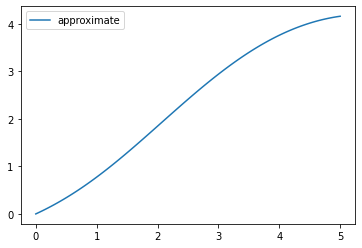

In [58]:
N = 100
t = np.linspace(0, 5, N)
y_approx = solve(coefs=np.array([243, 405, 270, 90, 15, 1]), f=lambda t: 0*t, start=np.array([0,3,9,8,0]), a=0, b=1, N=N)
plt.plot(t, y_approx, label='approximate')
plt.legend()